# Yulu - Hypothesis Testing

**About YULU**
 - Yulu is India's leading micro-mobility service provider.
 - Founded with a mission to eliminate traffic congestion in India.
 - Offers unique and sustainable transportation solutions for daily commutes.
 - Provides shared electric cycles for a convenient and eco-friendly commute.
 - Yulu zones are strategically located at various points, including metro stations, bus stands, offices, residential areas, and corporate offices.
 - A user-friendly mobile app facilitates shared, solo, and sustainable commuting.
 - Active in the Indian market, contributing to the local transportation ecosystem.
 - Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Problem Statement
The company wants to know:
* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

Link: https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing


**Column Profiling:**
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday : whether day is a holiday or not
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
   - Clear, Few clouds, partly cloudy
   - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

## Importing Required Libraries

In [1]:
# Importing libraries -

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from scipy.stats import ttest_ind    # T-test for independent samples
from scipy.stats import chi2_contingency  # Chi-square test of independence
from scipy.stats import f_oneway    # One-way ANOVA
from scipy.stats import levene     # Levene's test for Equality of Variance
from scipy.stats import shapiro    # Shapiro-Wilk’s test for Normality
from scipy.stats import kstest      # KS test for Normality
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Loading the dataset -
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Display basic information about the dataset -
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [4]:
# Shape of the dataset -
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 10,886 
Number of columns: 12


In [5]:
# Checking the datatype -
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
# Number of unique values in each column -
for i in df.columns:
    print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [7]:
#Changing the data type of columns with 'object' data type to 'category', since it can do memory optimization 
column= ['season', 'holiday', 'workingday', 'weather']
for i in column:
    df = df.astype({i : 'category'})
    
# Converting data type of datetime column to object to datetime 
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
(df['datetime'].max()- df['datetime'].min())

Timedelta('718 days 23:00:00')

* The total time period for which the data is given is '718 days 23:00:00'.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [10]:
# replacing the values in season column by 1 is spring, 2 is summer, 3 is fall and 4 is winter -
df['season'] = df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

# replacing the values in weather column by 1 is sunny, 2 is cloudy, 3 is rainy and 4 is heavy rain -
df['weather'] = df['weather'].replace({1:'sunny',2:'cloudy',3:'rainy',4:'heavy rain'})

# replacing the values in holiday column by 0 is holiday and 1 is not holiday
df['holiday'] = df['holiday'].replace({0:'holiday',1:'non holiday'})

# replacing the values in workingday column by 0 is weekend and 1 is not weekend
df['workingday'] = df['workingday'].replace({0:'weekend',1:'non weekend'})

In [11]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,winter,holiday,non weekend,sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


* The dataset contains 10886 rows and 12 columns of data
* The dataset contains information on bike sharing, with a total of 10,886 records.
* **datetime** The datetime column ranges from January 1, 2011, to December 19, 2012.
* **season** There are four unique season present.
* The season, holiday, weather and workingday columns have categorical values.
* The temperature, atemp (feels-like temperature), humidity, and windspeed columns represent numerical weather details.
* The count column is the target variable, representing the total number of bike rentals.
* casual and registered attributes might have outliers becauuse their mean and median values are very far away to one another

## Missing values and Outlier detection

In [12]:
# Checking for null values -
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* There aren't missing values in the data set




In [13]:
print('No of duplicated rows',df.duplicated().sum())

No of duplicated rows 0


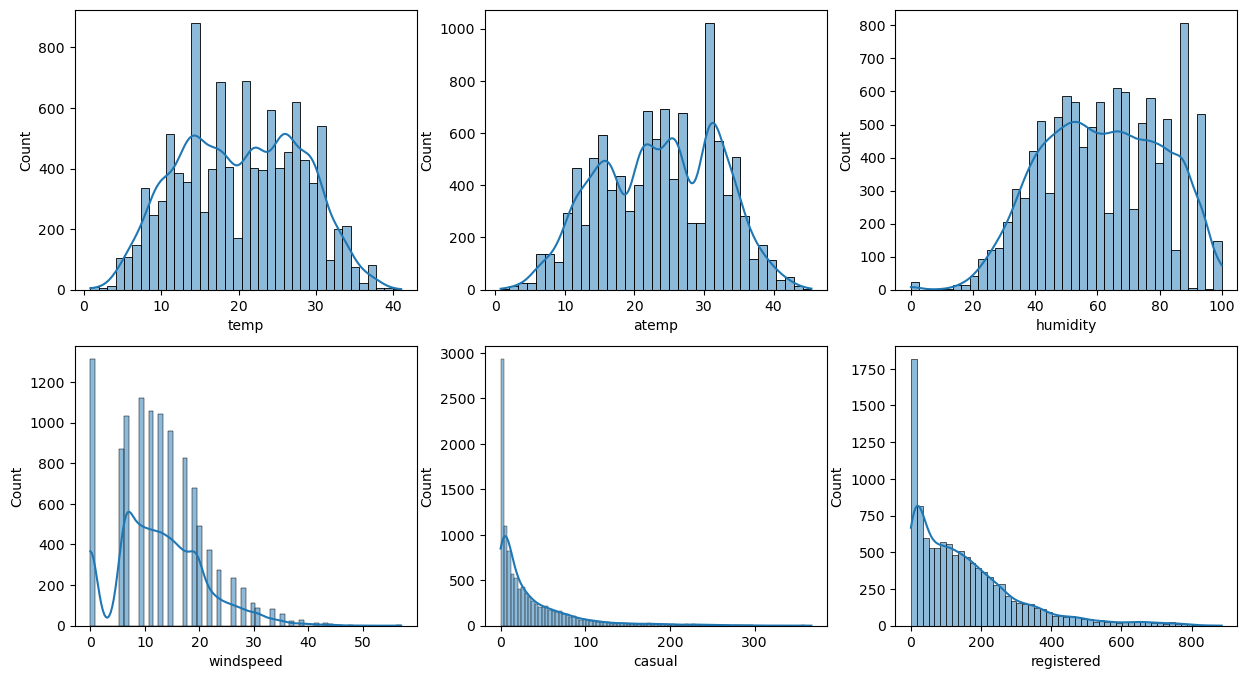

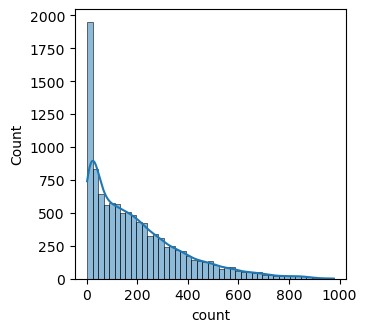

In [14]:
# plotting a histogram plot for numerical features
numerical_col = ['temp','atemp','humidity','windspeed','casual','registered','count']
fig , axs = plt.subplots(nrows=2,ncols=3,figsize=(15,8))
count = 0
for i in range(2):
    for j in range(3):
        sns.histplot(x=df[numerical_col[count]],ax=axs[i,j],kde=True)
        count += 1
plt.show()

plt.figure(figsize=(3.5,3.5))
plt.subplot(1,1,1)
sns.histplot(x=df['count'],kde=True)
plt.show()

**Insight**

**Casual, Registered, and Count**:
   * These variables somewhat look like Log-Normal distributions. Log-Normal distributions are often encountered when dealing with variables that can only take positive values, such as counts.

**Temp, Atemp, and Humidity**:
   
   * These variables appear to follow a Normal Distribution. Normal distributions are common in nature and many statistical methods assume data to be approximately normally distributed.

**Windspeed**:
   * Windspeed seems to follow a Binomial Distribution. It's interesting to note when a variable follows a binomial distribution, as it implies there are only two possible outcomes (success or failure) in each trial.

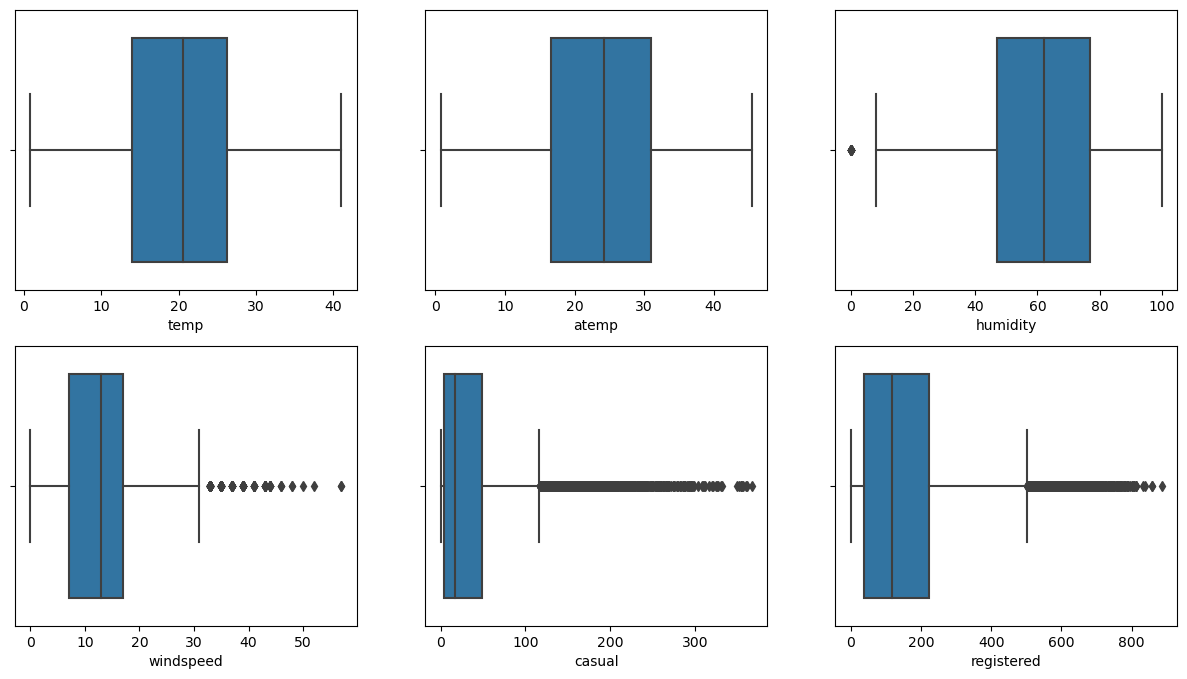

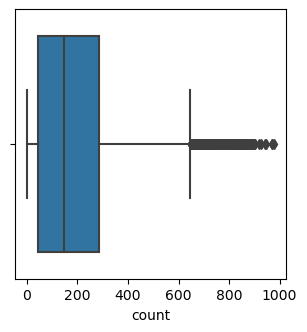

In [15]:
# plotting a histogram plot for numerical features
numerical_col = ['temp','atemp','humidity','windspeed','casual','registered','count']
fig , axs = plt.subplots(nrows=2,ncols=3,figsize=(15,8))
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(x=df[numerical_col[count]],ax=axs[i,j])
        count += 1
plt.show()

plt.figure(figsize=(3.5,3.5))
plt.subplot(1,1,1)
sns.boxplot(x=df['count'])
plt.show()

**Inshight**

 * There are no outlier present in the temp and atemp column.
 * There are very few outliers present in humidity and windspeed column.
 * Looks like there are more outliers present in casual, registered, count.

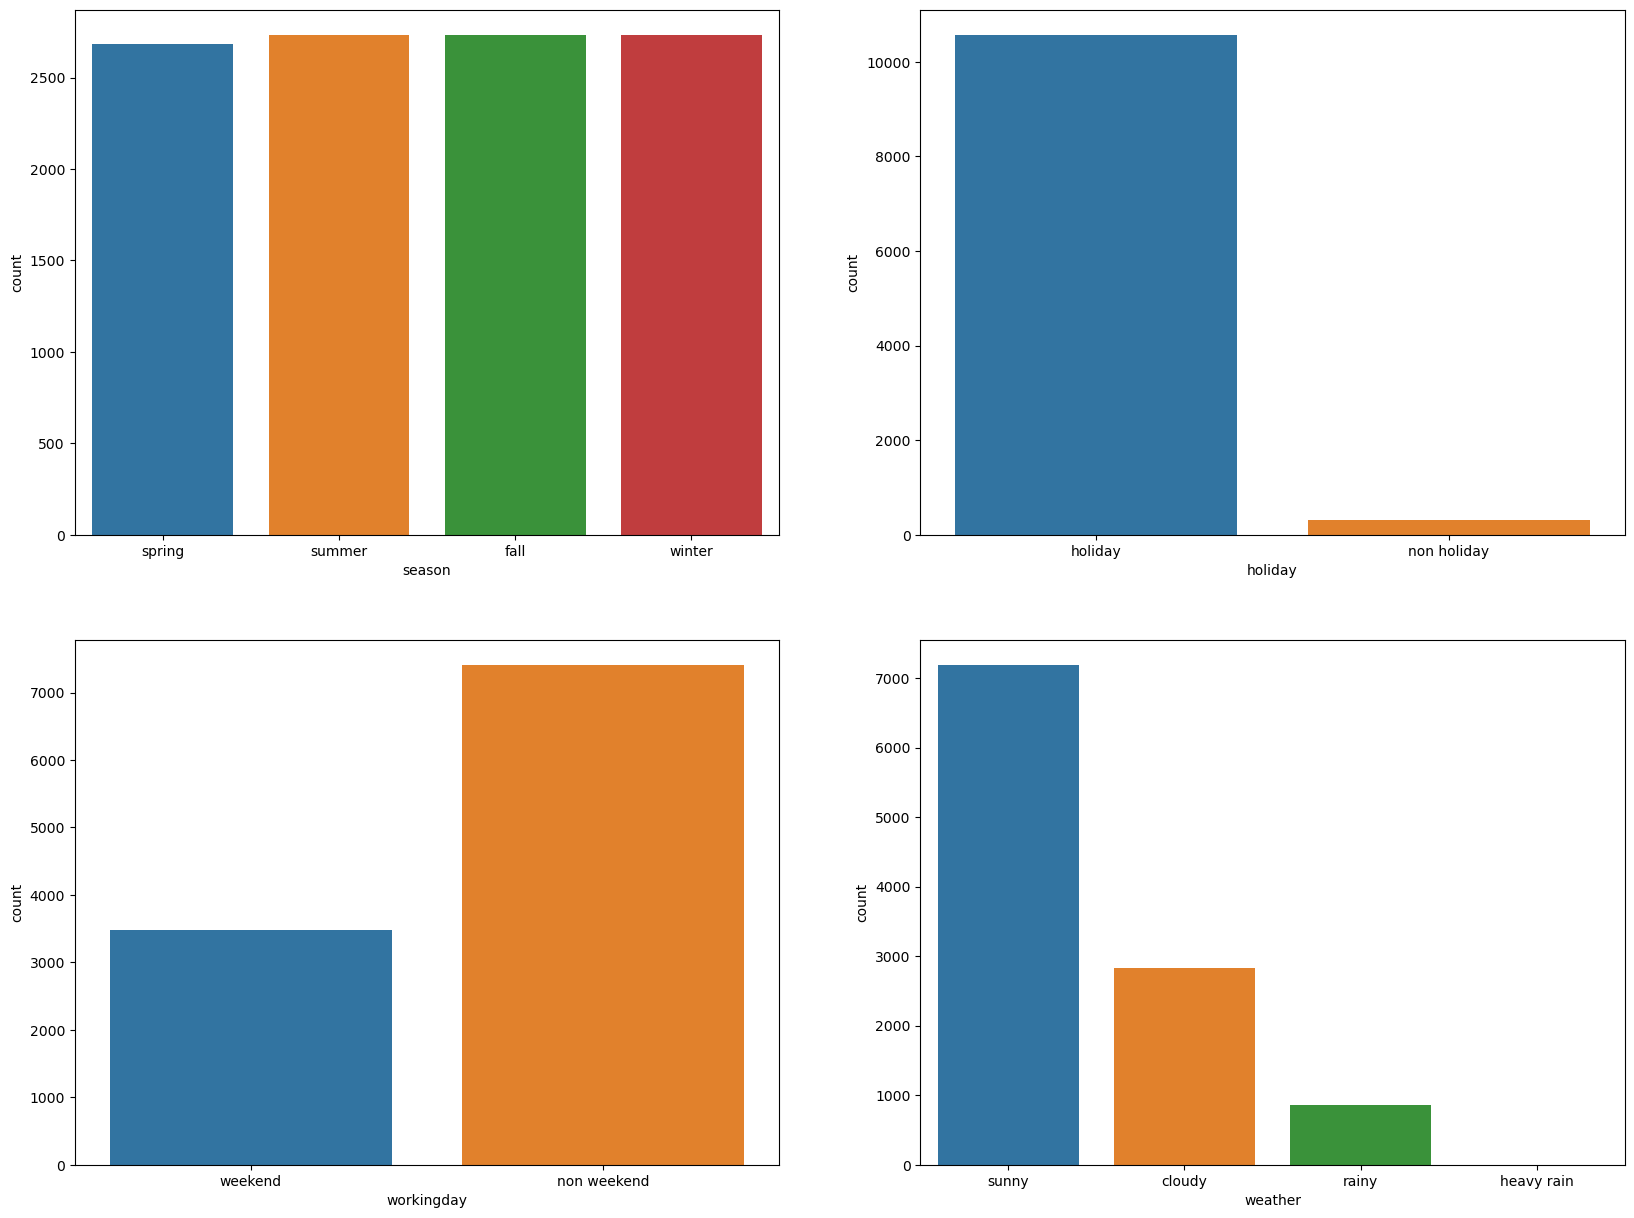

In [16]:
# plotting a boxplot plot for categorical features - 

categorical_col = ['season','holiday','workingday','weather']
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
count = 0
for i in range(2):
    for j in range(2):
        label = sns.countplot(x=df[categorical_col[count]],ax=axs[i,j])
        count += 1
plt.show()



**Insight**
* The distribution of ride counts is approximately the same in spring, summer, fall, and winter.

* ride are more when there is holiday

* On non-weekend days, the ride count is significantly higher.

* For weather conditions categorized as clear, few clouds, or partly cloudy, there is a higher number of rides when during sunny. In contrast, during heavy rain, ice pellets, or foggy conditions, the ride count is close to zero we can remove that.

In [17]:
# removing heavy rain row from wether it doesn't make any differnce by removing it 

df[df['weather']=='heavy rain']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,spring,holiday,non weekend,heavy rain,8.2,11.365,86,6.0032,6,158,164


In [18]:
df.drop(df[df['weather'] == 'heavy rain'].index, inplace=True)

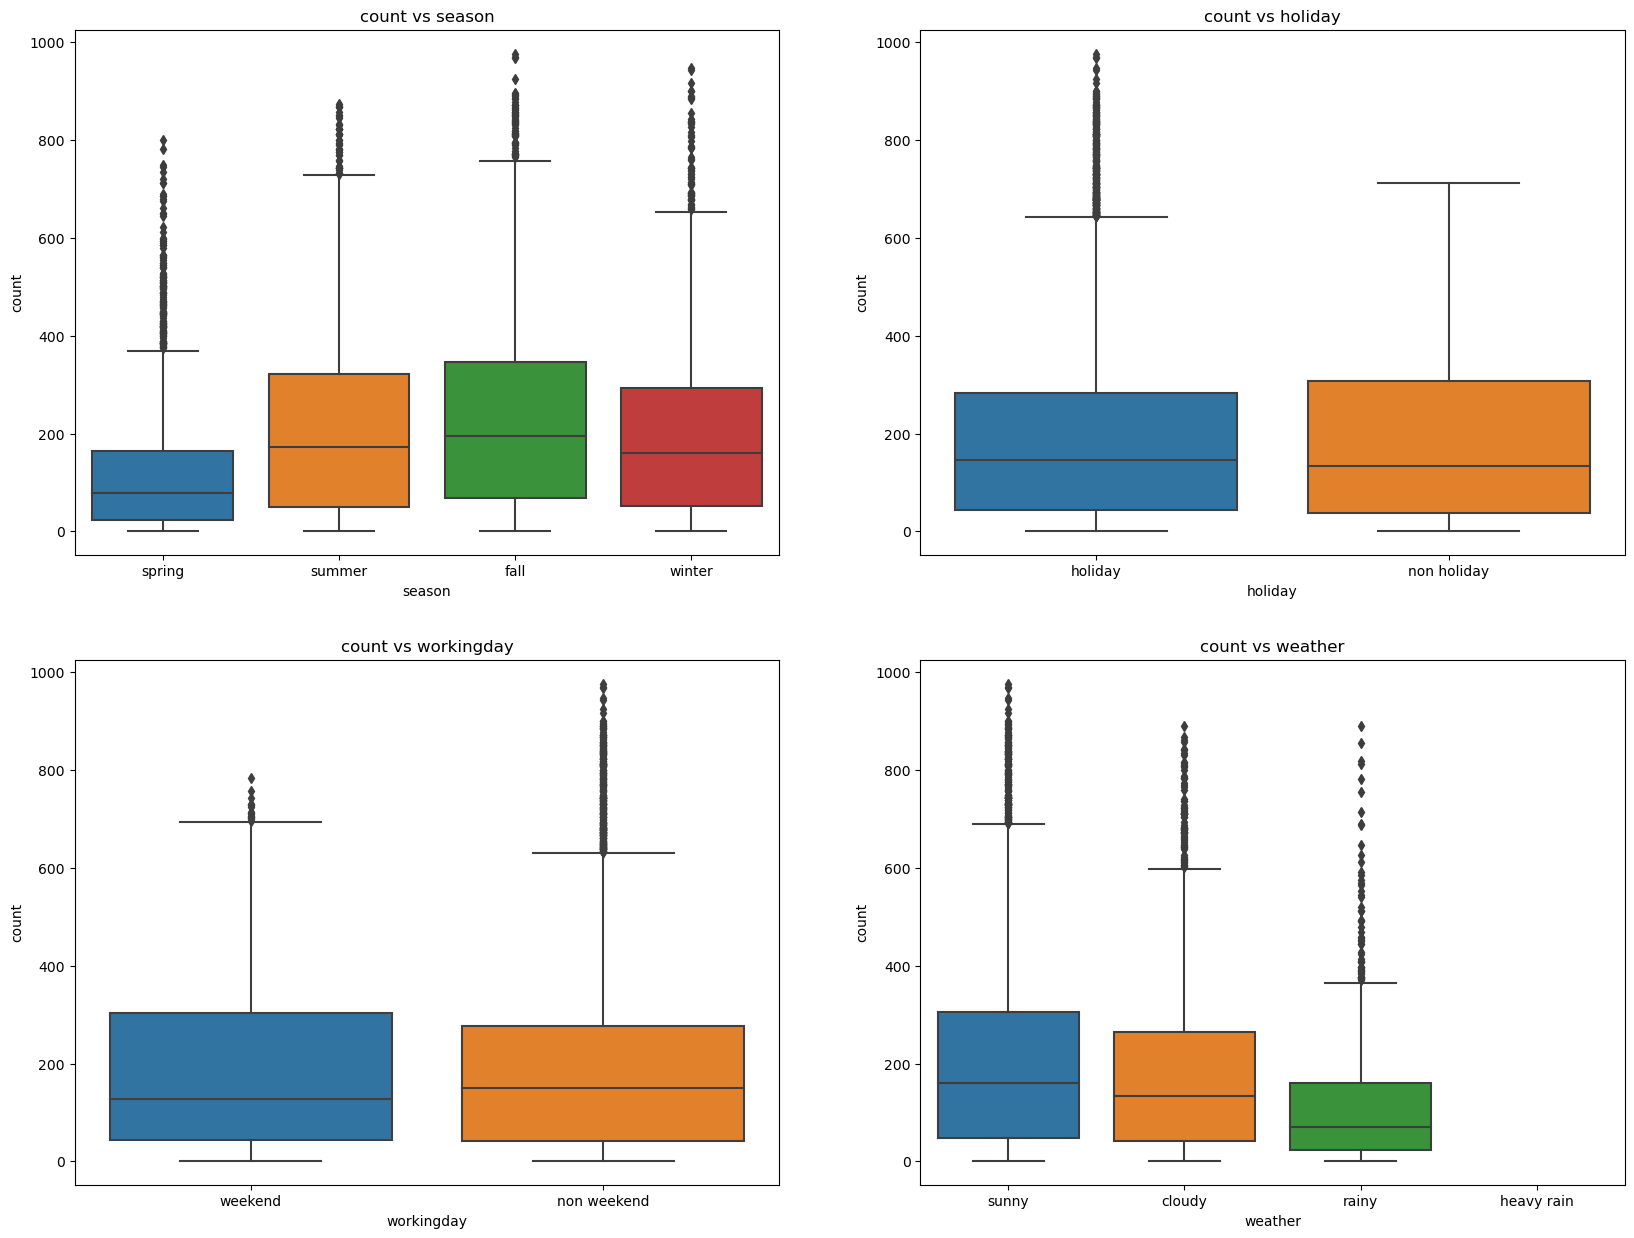

In [19]:
# comparing count accros differentt categoryies
categorical_col = ['season','holiday','workingday','weather']
fig.subplots_adjust(top=1.5)

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x=df[categorical_col[count]],y=df['count'],ax=axs[i,j])
        axs[i,j].set_title(f'count vs {categorical_col[count]}')
        count += 1
plt.show()


**Insights**

* Bike rentals are higher during the summer and fall compared to spring and winter. However, it's challenging to determine which season performs better, as the medians for fall and summer appear approximately similar. Further statistical tests, such as a t-test for independent samples, are needed for a conclusive comparison.

* There is no significant difference in bike rentals between holiday and non-holiday days, as their medians are similar.

* The median bike rentals on weekends and non-weekends are also comparable. To determine the better-performing category, hypothesis testing is recommended.

* During adverse weather conditions such as rain, thunderstorms, snow, or fog, bike rentals tend to decrease. This suggests that weather conditions play a role in bike rental demand, with fewer rentals during unfavorable weather.

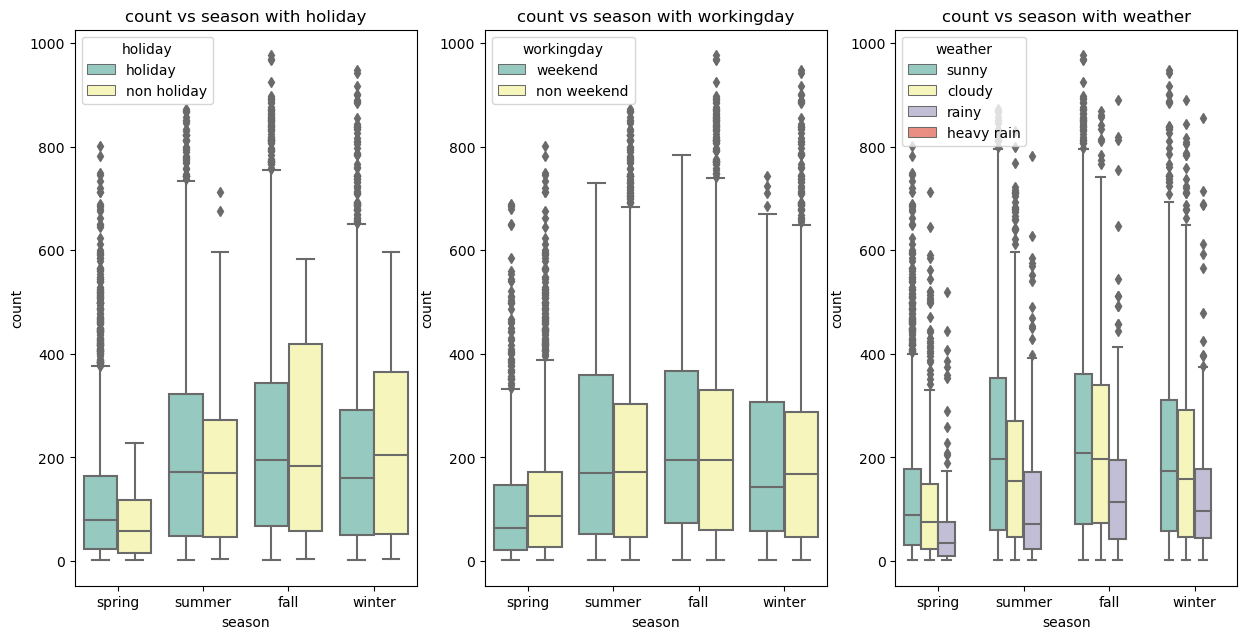

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(top=1.5)

sns.boxplot(data=df, y='count', x='season', hue='holiday', palette='Set3', ax=axs[0])
axs[0].set_title('count vs season with holiday')

sns.boxplot(data=df, y='count', x='season', hue='workingday', palette='Set3', ax=axs[1])
axs[1].set_title('count vs season with workingday')

sns.boxplot(data=df, y='count', x='season', hue='weather', palette='Set3', ax=axs[2])
axs[2].set_title('count vs season with weather')


plt.show()

**Insight**
**Insight:**

* A notable observation is that a higher number of bikes are rented during the winter holiday season.

* However, during the spring, fall, and summer seasons, it's inconclusive to determine the performance difference between holiday and non-holiday periods based solely on the median values. Further investigation through hypothesis testing is recommended to establish which category performs better in terms of bike rentals..

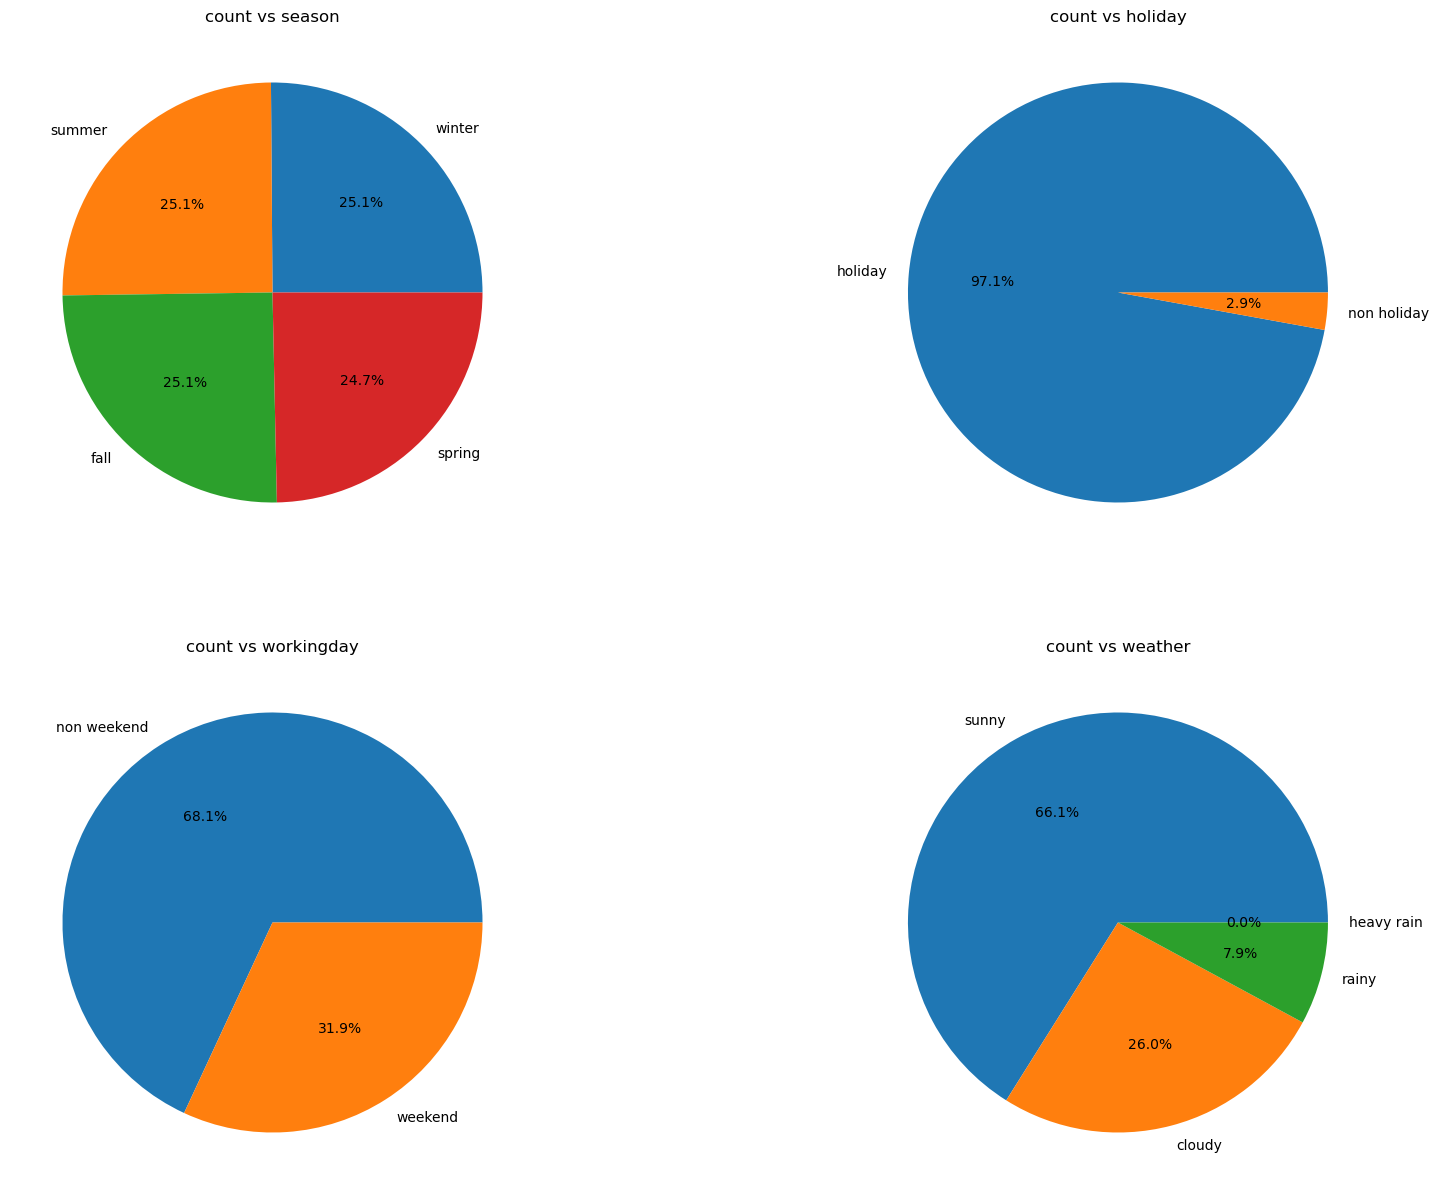

In [21]:
# Distribution of categorical value using pie chart

categorical_col = ['season', 'holiday', 'workingday', 'weather']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
# fig.subplots_adjust(top=1.5)

count = 0
for i in range(2):
    for j in range(2):
        labels = df[categorical_col[count]].value_counts().index
        values = df[categorical_col[count]].value_counts()
        
        axs[i, j].pie(values, labels=labels, autopct='%1.1f%%')
        axs[i, j].set_title(f'count vs {categorical_col[count]}')
        
        count += 1

plt.show()


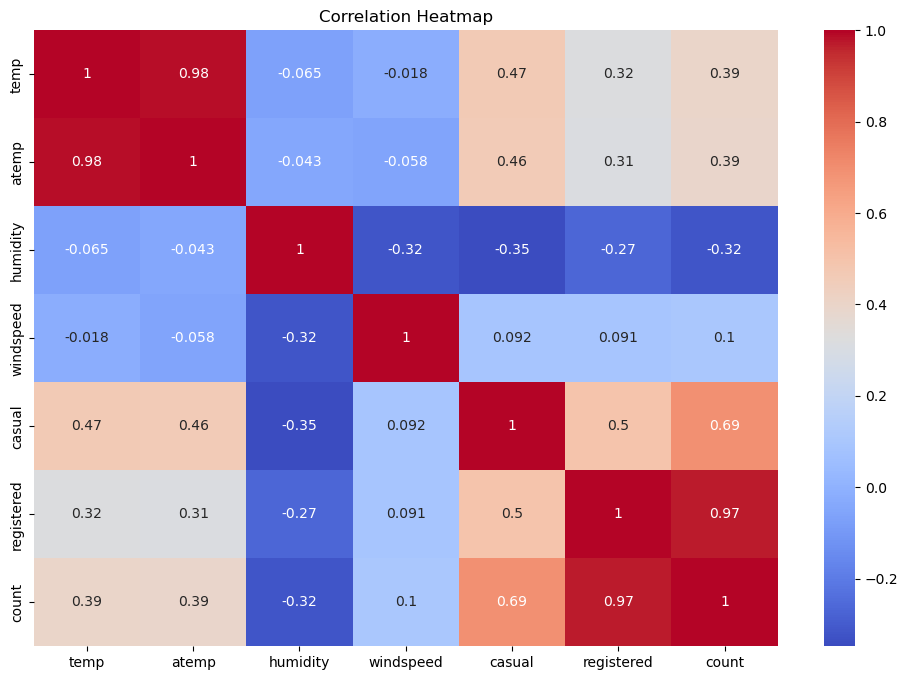

In [22]:
#  Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


from the correlation we can verify some logical points:
* feeling temp and atemp are highly correlated
* count, causal, registered are all correlated to each other because all of them here count is addtion of causal and registered


In [23]:
#  Dropping highly correlated columns -
dfn = df.drop(columns=['casual', 'registered', 'atemp'])


In [24]:
dfn.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
spring,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


* Here we can see that median are not same for all hence outlier treatment has to been done (not needed but outlier treatment)

In [25]:
q1 = df['count'].quantile(.25)
q3 = df['count'].quantile(.75)
iqr = q1 - q3
# dfn = dfn[(dfn['count'] <= q3+iqr*1.5) & (dfn['count'] >= q1-iqr*1.5)]
# We might not need to remove outliers because doing so can affect all values in the dataset. 

# Difference in Bike Rides on Weekend and non Weekends

<Axes: xlabel='workingday', ylabel='count'>

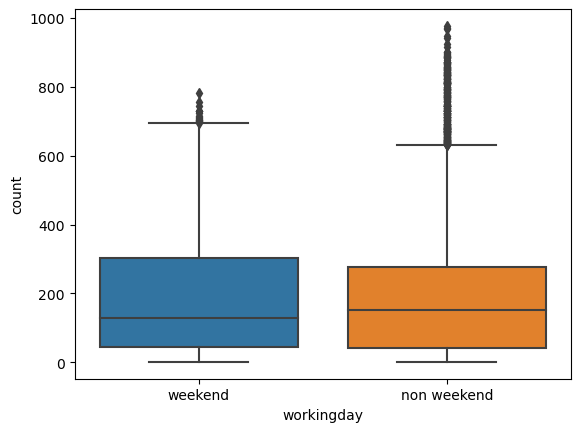

In [26]:
sns.boxplot(x=df['workingday'],y=df['count'])

In [27]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
weekend,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
non weekend,7411.0,193.015787,184.525801,1.0,41.0,151.0,277.0,977.0


**Hypothesis Testing**

In [28]:
## Hypothesis Testing

# Null hypothesis (H0): No significant difference between weekend and non weekend bike rides
# Alternate hypothesis (H1): Significant difference between weekend and non weekend bike rides

# Set a seed for reproducibility whenever we run the code code should not get affected 
np.random.seed(52)
non_weekend_bike_rides = df[df['workingday'] == 'non weekend']['count'].sample(3474)
weekend_bike_rides = df[df['workingday'] == 'weekend']['count'].sample(3474)

t_stat, p_value = ttest_ind(non_weekend_bike_rides, weekend_bike_rides,alternative='greater')
print("t_stat : ",t_stat.round(4))
print("p_value : ",p_value.round(4))

# Set a significance level (alpha=0.05)
alpha = 0.05

# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: Significant difference between weekend and non weekend bike rides ")
else:
    print("Fail to reject the null hypothesis: No significant difference between weekend and non weekend bike rides")



t_stat :  0.3523
p_value :  0.3623
Fail to reject the null hypothesis: No significant difference between weekend and non weekend bike rides



**Insight:**
* The results of the hypothesis test reveal that there is no significant difference between the mean number of bike rides on weekdays and weekends. The observed t-statistic of 0.2469 and p-value of 0.4025 suggest that the difference is not statistically significant.

**Recommendation:**
* It appears that the mean number of bike rides on weekdays is not significantly different from that on weekends. It might be advisable to focus on other factors influencing bike ride patterns or explore more specific time periods or conditions that could exhibit variations in bike rentals.

# Difference in Bike Rides on holiday's and non holiday's

<Axes: xlabel='holiday', ylabel='count'>

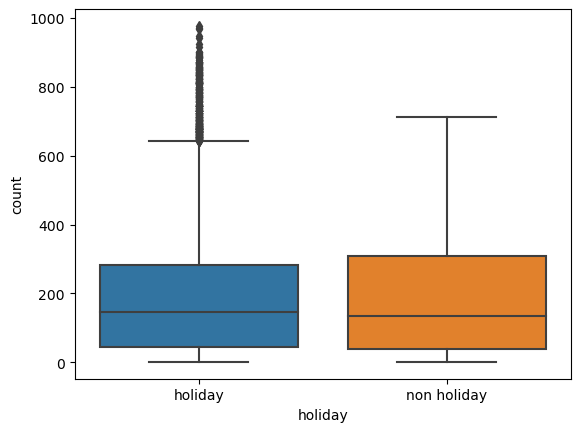

In [29]:
# plot the boxplot to compare which is better

sns.boxplot(x=df['holiday'],y=df['count'])

In [30]:
df.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
holiday,10574.0,191.744278,181.521514,1.0,43.0,145.0,283.0,977.0
non holiday,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


**Hypothesis Testing**


In [31]:
## Hypothesis Testing

# Null hypothesis (H0): No significant difference between holiday's and non holiday's bike rides
# Alternate hypothesis (H1): Significant difference between holiday's and non holiday's bike rides

# Set a seed for reproducibility whenever we run the code code should not get affected 
np.random.seed(52)
non_holiday_bike_rides = df[df['holiday'] == 'non holiday']['count'].sample(311)
weekend_holiday_rides = df[df['holiday'] == 'holiday']['count'].sample(311)

t_stat, p_value = ttest_ind(non_holiday_bike_rides, weekend_holiday_rides,alternative='greater')
print("t_stat : ",t_stat.round(4))
print("p_value : ",p_value.round(4))

# Set a significance level (alpha=0.05)
alpha = 0.05

# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: Significant difference between holiday's and non holiday's bike rides ")
else:
    print("Fail to reject the null hypothesis: No significant difference between holiday's and non holiday's bike rides")



t_stat :  -0.9287
p_value :  0.8233
Fail to reject the null hypothesis: No significant difference between holiday's and non holiday's bike rides


**Insight:**
* The results of the hypothesis test indicate that there is no significant difference between the mean number of bike rides on holidays and non-holidays. The observed t-statistic of -0.6311 and p-value of 0.7359 suggest that the difference is not statistically significant.

**Recommendation:**
* It appears that the mean number of bike rides on holidays is not significantly different from that on non-holidays. Further exploration into specific time periods or conditions may be necessary to identify factors influencing bike ride patterns. 

# Difference in Bike Rides on different season

<Axes: xlabel='season', ylabel='count'>

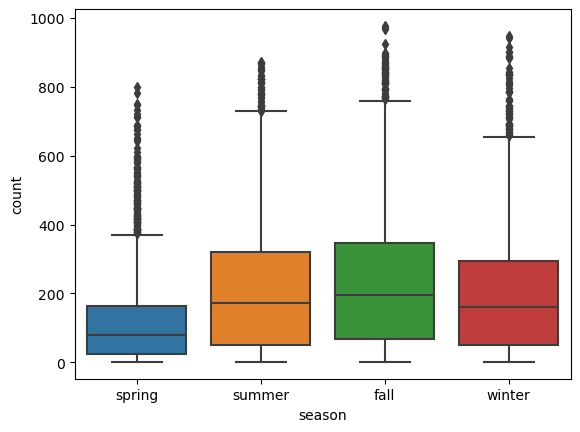

In [32]:
# plot the boxplot to compare which is better

sns.boxplot(x=df['season'],y=df['count'])

In [33]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
spring,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


**Hypothesis Testing**

This is a problem, concerning three independent population means. One-way ANOVA could be the
appropriate test here provided normality and equality of variance assumptions are verified.


1) The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
   * The samples are independent.
   * Each sample is from a normally distributed population.
   * The population variance of the groups are all equal.
2) To check above condtition we must perform -
   * `Shapiro–Wilk` test to check data is gaussian or not
   * For visualization we must perform `QQ-Plot` here point should lie on straight line
   * If the varience are not equal between groups we must perform `levene test` 
   
3) Note: If these assumptions are not true for a given set of data (like in this case), it may still be possible to use the `Kruskal-Wallis` test  test although with some loss of power.


Shapiro–Wilk test
shapiro_spring_rides: p_value- 0.0
shapiro_summer_bike_rides: p_value- 4.702170502217534e-39
shapiro_fall_bike_rides: p_value- 2.911832964410471e-37
shapiro_winter_bike_rides: p_value- 2.5719572144064125e-40
Reject the null hypothesis: Data is not Gaussian

Levene test
levene_test p value: 4.209269591610833e-115
Reject the null hypothesis: Varience are not equal

 QQ-Plot


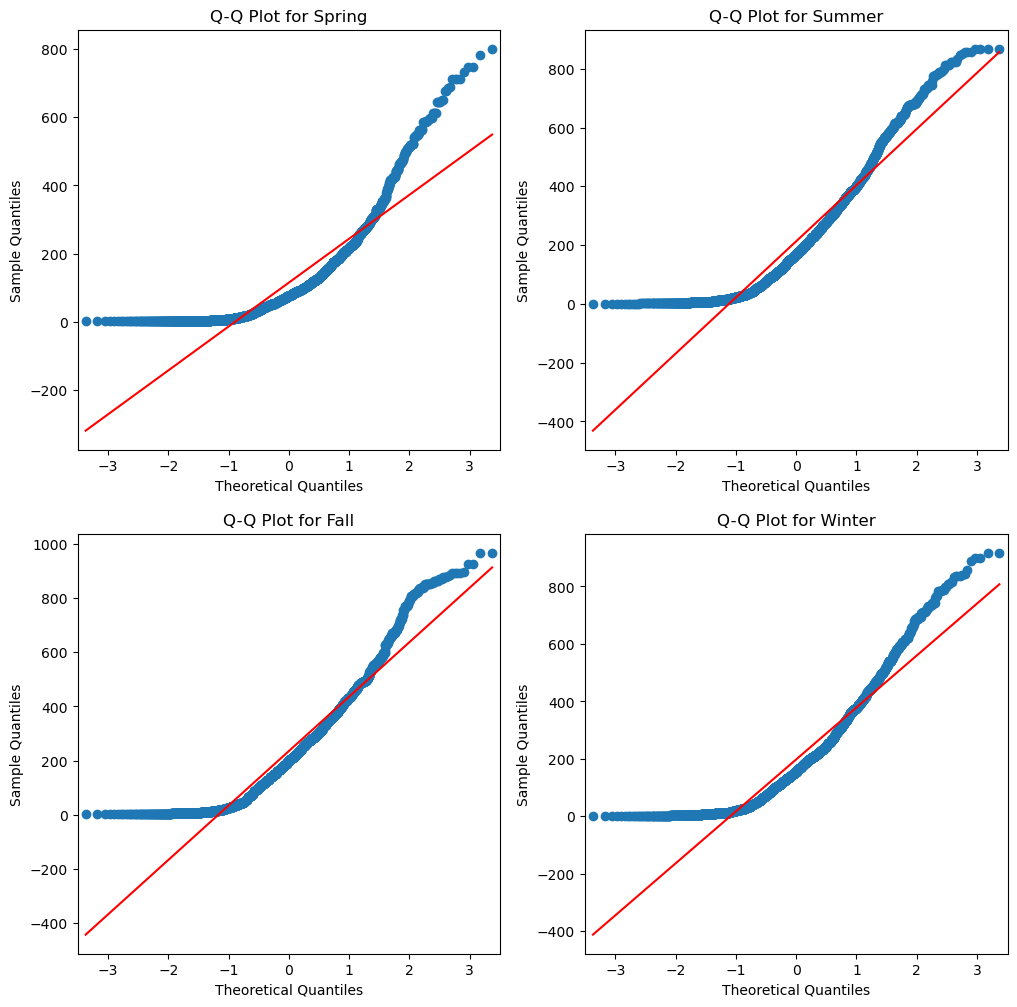

In [34]:
# Hypothesis Testing

# checking the anova condtion

# Set a seed for reproducibility whenever we run the code code should not get affected 
np.random.seed(52)
spring_bike_rides = df[df['season'] == 'spring']['count'].sample(2686,replace=True)
summer_bike_rides = df[df['season'] == 'summer']['count'].sample(2686,replace=True)
fall_bike_rides = df[df['season'] == 'fall']['count'].sample(2686,replace=True)
winter_bike_rides = df[df['season'] == 'winter']['count'].sample(2686,replace=True)

# shapiro test (it works best when sample size is between 50-200)
# Null hypothesis (H0): Data is Gaussian 
# Alternate hypothesis (Ha): Data is not Gaussian
a, b = shapiro(spring_bike_rides)
c, d = shapiro(summer_bike_rides)
e, f = shapiro(fall_bike_rides)
g, h = shapiro(winter_bike_rides)

print('Shapiro–Wilk test')
print('shapiro_spring_rides: p_value-',b)
print('shapiro_summer_bike_rides: p_value-',d)
print('shapiro_fall_bike_rides: p_value-',f)
print('shapiro_winter_bike_rides: p_value-',h)

# Set a significance level 
alpha=0.05
# Decision based on p-value
if b <= alpha:
    print("Reject the null hypothesis: Data is not Gaussian")
else:
    print("Fail to reject the null hypothesis: Data is Gaussian")


# Levene test to check varience are equal or not
# Null hypothesis (H0): varience are equal for all weather
# Alternate hypothesis (Ha): varience are not equal for all weather
a,levene_test = levene(spring_bike_rides,summer_bike_rides,fall_bike_rides,winter_bike_rides)
print('\nLevene test')
print('levene_test p value:',levene_test)
if b <= alpha:
    print("Reject the null hypothesis: Varience are not equal")
else:
    print("Fail to reject the null hypothesis: Varience are equal")
    
    
# visualization for all weather condition using qq-plot
print('\n QQ-Plot')
season_sample = [spring_bike_rides,summer_bike_rides,fall_bike_rides,winter_bike_rides]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
count = 0
for i in range(2):
    for j in range(2):
        qqplot(season_sample[count],line='s',ax=axs[i,j])
        axs[i,j].set_title(f'Q-Q Plot for {seasons[count]}')
        count +=1
plt.show()
        



**Insight:**
* The Q-Q plots show that the points don't form a straight line, indicating that the data for each season is not normally distributed. 
* The Shapiro-Wilk tests confirm this by giving p-values below the chosen significance level data is not Gaussian . 
* Additionally, the Levene test indicates that the variability (variance) in the datasets is not the same. In simpler terms, the data for bike rides in different seasons doesn't follow a normal pattern, and the variation among the seasons is not consistent.

Central Limit Theorem (clt) -

* According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.
* In other words, if we find the mean of a large number of independent random variables, the mean will follow a normal distribution, irrespective of the distribution of the original variables.
* In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.
* Hence, the sample size being large enough, we don't need to worry about the non-normality of distribution of the data set in hand before applying the tests.
* Eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.


In [35]:
# perform anova test f_oneway because it follow clt

# Null hypothesis (H0): No significant difference in demand for bicycles in different seasons
# Alternate hypothesis (Ha): Significant difference in demand for bicycles in different seasons

# Set a seed for reproducibility whenever we run the code code should not get affected 
np.random.seed(52)
t_stats, p_value = f_oneway(spring_bike_rides,summer_bike_rides,winter_bike_rides,fall_bike_rides)

print("t_stat : ",t_stat.round(4))
print("p_value : ",p_value.round(4))

# Set a significance level 
alpha=0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: Significant difference in demand for bicycles in different seasons")
else:
    print("Fail to reject the null hypothesis:No significant difference in demand for bicycles in different seasons")

t_stat :  -0.9287
p_value :  0.0
Reject the null hypothesis: Significant difference in demand for bicycles in different seasons


**Insight:**
* The ANOVA test results suggest a significant difference in the demand for bicycles across different seasons. The obtained p-value of 0.0, falling below the chosen significance level of 0.05, leads to the rejection of the null hypothesis.
* Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.


## Difference in Bike Rides on different weather


<Axes: xlabel='weather', ylabel='count'>

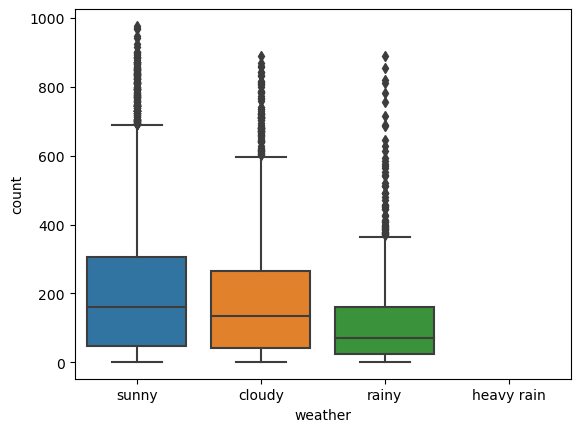

In [36]:
sns.boxplot(x=df['weather'],y=df['count'])

In [37]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
sunny,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
cloudy,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
rainy,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
heavy rain,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Hypothesis Testing**

This is a problem, concerning three independent population means. One-way ANOVA could be the
appropriate test here provided normality and equality of variance assumptions are verified.


1) The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
   * The samples are independent.
   * Each sample is from a normally distributed population.
   * The population variance of the groups are all equal.
2) To check above condtition we must perform -
   * `Shapiro–Wilk` test to check data is gaussian or not
   * For visualization we must perform `QQ-Plot` here point should lie on straight line
   * If the varience are not equal between groups we must perform `levene test` 
   
3) Note: If these assumptions are not true for a given set of data (like in this case), it may still be possible to use the `Kruskal-Wallis` test  test although with some loss of power.


Shapiro–Wilk test
bike_rides_1: p_value- 3.20248319944715e-24
bike_rides_2: p_value- 7.409606399672678e-24
bike_rides_3: p_value- 3.307841103213917e-32
Reject the null hypothesis: Data is not Gaussian

Levene test
levene_test p value: 2.0395427439177973e-26
Reject the null hypothesis: Varience are not equal

 QQ-Plot


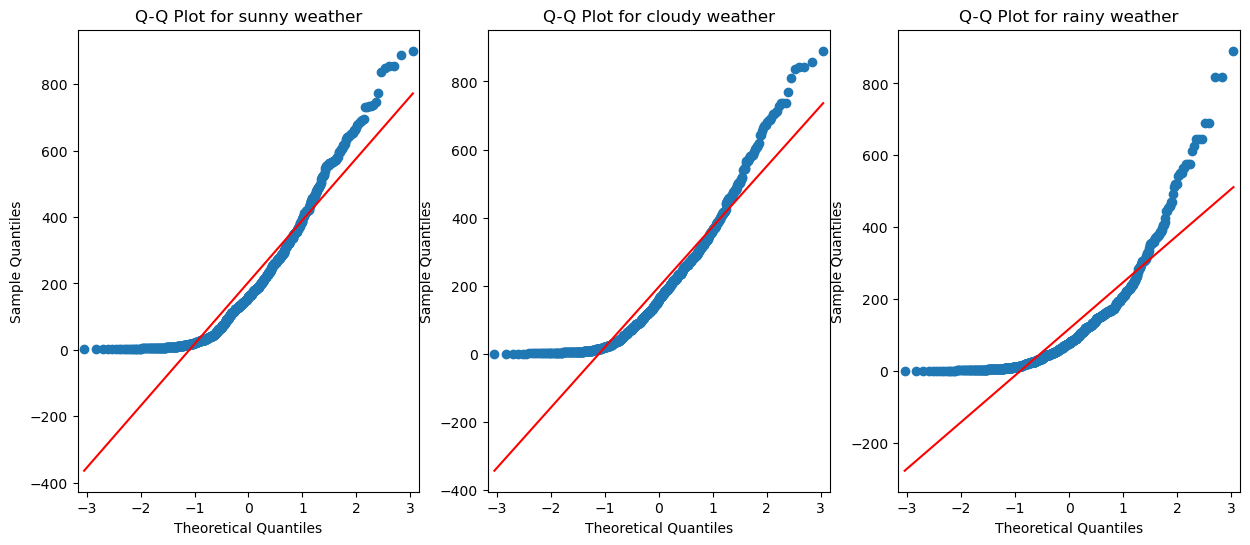

In [38]:
# checking the anova condtion

# Set a seed for reproducibility whenever we run the code code should not get affected 
np.random.seed(52)
bike_rides_1 = df[df['weather'] == 'sunny']['count'].sample(859,replace=True)
bike_rides_2 = df[df['weather'] == 'cloudy']['count'].sample(859,replace=True)
bike_rides_3 = df[df['weather'] == 'rainy']['count'].sample(859,replace=True)

# shapiro test (it works best when sample size is between 50-200)
# Null hypothesis (H0): Data is Gaussian 
# Alternate hypothesis (Ha): Data is not Gaussian
a, b = shapiro(bike_rides_1)
c, d = shapiro(bike_rides_2)
e, f = shapiro(bike_rides_3)

print('Shapiro–Wilk test')
print('bike_rides_1: p_value-',b)
print('bike_rides_2: p_value-',d)
print('bike_rides_3: p_value-',f)

# Set a significance level 
alpha=0.05
# Decision based on p-value
if b <= alpha:
    print("Reject the null hypothesis: Data is not Gaussian")
else:
    print("Fail to reject the null hypothesis: Data is Gaussian")


# Levene test to check varience are equal or not
# Null hypothesis (H0): varience are equal for all weather
# Alternate hypothesis (Ha): varience are not equal for all weather
a,levene_test = levene(bike_rides_1,bike_rides_2,bike_rides_3)
print('\nLevene test')
print('levene_test p value:',levene_test)
if b <= alpha:
    print("Reject the null hypothesis: Varience are not equal")
else:
    print("Fail to reject the null hypothesis: Varience are equal")
    
    
# visualization for all weather condition using qq-plot


print('\n QQ-Plot')
weather_sample = [bike_rides_1,bike_rides_2,bike_rides_3]
wether = ['sunny','cloudy','rainy']
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
count = 0
for i in range(1):
    for j in range(3):
        qqplot(weather_sample[count],line='s',ax=axs[j])
        axs[j].set_title(f'Q-Q Plot for {wether[j]} weather')
        count +=1
plt.show()
        



**Insight:**
* The Q-Q plots show that the points don't form a straight line, indicating that the data for each season is not normally distributed. 
* The Shapiro-Wilk tests confirm this by giving p-values below the chosen significance level data is not Gaussian . 
* Additionally, the Levene test indicates that the variability (variance) in the datasets is not the same. In simpler terms, the data for bike rides in different seasons doesn't follow a normal pattern, and the variation among the seasons is not consistent.

Central Limit Theorem (clt) -

* According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.
* In other words, if we find the mean of a large number of independent random variables, the mean will follow a normal distribution, irrespective of the distribution of the original variables.
* In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.
* Hence, the sample size being large enough, we don't need to worry about the non-normality of distribution of the data set in hand before applying the tests.
* Eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.


In [39]:
# perform anova test f_oneway because it follow clt

# Null hypothesis (H0): No significant difference in demand for bicycles in different weather conditions
# Alternate hypothesis (Ha): Significant difference in demand for bicycles in different weather conditions

# Set a seed for reproducibility whenever we run the code code should not get affected 
np.random.seed(52)
t_stats, p_value = f_oneway(bike_rides_1,bike_rides_2,bike_rides_3)

print("t_stat : ",t_stat.round(4))
print("p_value : ",p_value.round(4))

# Set a significance level 
alpha=0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: Significant difference in demand for bicycles in different weather conditions")
else:
    print("Fail to reject the null hypothesis:No significant difference in demand for bicycles in different weather conditions")

t_stat :  -0.9287
p_value :  0.0
Reject the null hypothesis: Significant difference in demand for bicycles in different weather conditions


**Insight:**
* The ANOVA test results suggest a significant difference in the demand for bicycles across different weather conditions. The obtained p-value of 0.0, falling below the chosen significance level of 0.05, leads to the rejection of the null hypothesis.
* Hence, we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.


## Weather Conditions during Different Seasons

In [40]:
# 6.1 Hypothesis Testing
contingency_table = pd.crosstab(df['weather'], df['season'])

# Null hypothesis (H0): Weather conditions are independent of seasons
# Alternate hypothesis (Ha): Weather conditions are dependent on seasons

chi2, p_value,_ , _ = chi2_contingency(contingency_table)

print('contingency_table','\n\n', contingency_table,'\n')
print("chi2 : ",chi2.round(4))
print("p_value : ",p_value.round(4))

# Set a significance level 
alpha=0.05

# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: Weather conditions are dependent on seasons")
else:
    print("Fail to reject the null hypothesis: Weather conditions are independent of seasons")





contingency_table 

 season   spring  summer  fall  winter
weather                              
sunny      1759    1801  1930    1702
cloudy      715     708   604     807
rainy       211     224   199     225 

chi2 :  46.1015
p_value :  0.0
Reject the null hypothesis: Weather conditions are dependent on seasons


**Insights:**

* The chi-square statistic (chi2) is 46.1015, and the p-value is very close to zero (0.0). This indicates a statistically significant association between weather conditions and seasons.
* The contingency table shows the observed counts of weather conditions (sunny, cloudy, rainy) for each season (spring, summer, fall, winter).


## Insights and Recommendations

1) **EDA based insights** - 
    - Total 10,886 rows were present in the data set.
    - Neither missing values, nor duplicate rows were found.
    - 'temp' and 'atemp' columns were found to be highly correlated. Dropping one of them (atemp) to avoid multicollinearity.
    - 'count', 'casual' and 'registered' columns were highly correlated. Dropping casual & registered columns to avoid multicollinearity.
   - Outlier values were found in the 'count' column.
   - The total time period for which the data is given is '718 days 23:00:00'.
2) **Insights from hypothesis testing** -
   - There is no significant difference between the mean number of bike rides on weekdays and weekends
   - There is no significant difference between the mean number of bike rides on holidays and non-holidays
   - The demand of bicycles on rent differs under different weather conditions.
   - The demand of bicycles on rent is different during different seasons.
   - The weather conditions are surely dependent upon the ongoing season.
   - During sunny weather more number of bikes are rented compared to other weathers like rainy, cloudy, snow, cloud
   - During fall seasons more number of bikes are rented comared to winter, summer and spring
   
3) **Generic recommendations** -
     - Investigate whether certain weather conditions are more common during specific seasons due to geographical or climate factors.
    - The demand of bikes on rent are usually higher during Weekdays.
    - The demand of bikes on rent are usually higher during Regular days.
    - The chances of person renting a bike are usually higher during Season fall.
    - The chances of person renting a bike are usually higher during Weather condition 1.
    - We recommend the company to maintain the bike stocks accordingly.
    - Inform the general public about the statistical relationship between weather and seasons. This could be relevant for clothing retailers, outdoor activity organizers, and individuals planning seasonal events.
    